# Reporte 7

### $Aisha Martínez$

#### Parte teórica:

Los autores ahondan en las consecuencias que puedan ser obtenidas del desplazo de niños con hogares pertenecientes a barrios pobres a unos con menos índice de pobreza. Esto se debe a que se busca explorar el impacto de este caso en los ingresos monetarios de los niños en el futuro, para saber si es que lograrían tener la oportunidad de obtener mayores ingresos en su futuro a comparación a lo que podrían haber obtenido si es que se quedaban en los barrios pobres. 

Una de las fortalezas que considero son de las más importantes es el hecho de haber incluido, aparte de la base de datos como fundamento, tres grupos de familias. El primer grupo recibió un váucher para rentar casas en zonas con un índice de pobreza menor en un 10%; el segundo grupo recibió de igual forma los váuchers, pero no hubo un seguimiento por parte de los creadores del experimento; y el tercer grupo no recibió ningún váucher ni un seguimiento, simplemente una consejería para guiarlos en el proceso de mudanza. Asimismo, otra fortaleza es el haber utilizado una tabla con la información exacta de las variables dependientes para poder observar el sesgo entre los tres grupos anteriormente mencionados, llegando a la conclusión de que sí hay un sesgo pronunciado donde vivir en mejores barrios tendrá un impacto positivo en el futuro de educación e ingresos de los niños. Por otro lado, una de las debilidades encontradas en el texto es que debió haberse puesto en práctica el mismo experimento y los análisis realizados en un país en desarrollo para así comparar entre dos modelos cuál es la brecha y diferencias resultadas del mismo experimento. Asimismo, otra debilidad es que habría sido bueno agregar a la discusión y análisis un, aunque sea, breve desarrollo del rendimiento escolar que tenían estos niños, para observar si de esto también dependieron los resultados obtenidos.

Personalmente, opino que el aporte de los autores es haber brindado tres grupos de ejemplo que acompañaron el desarrollo de la investigación. De esta forma no solo se observó teóricamente cómo podría llevarse a cabo la situación y cuáles podrían ser los posibles resultados que comprobarían o no la hipótesis, sino que el experimento ayudó a acompañar la argumentación estadística brindada a lo largo del trabajo.

El siguiente paso a ejecutar podría ser evaluar los ingresos de los padres, así como también agregar un seguimiento especialmente hacia ellos para ver si estos se encuentran en la capacidad de brindar una mejor educación a sus hijos, no solo económicamente, sino invertir estos váuchers directamente en el futuro de sus hijos y no a beneficio propio.


#### Parte código:
##### Aisha Martínez y Claudia Cabrel

In [21]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
from causalgraphicalmodels import CausalGraphicalModel
from cProfile import label
from sklearn.linear_model import LinearRegression

In [22]:
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [23]:
data1 = (data.assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" 
 ))) 
data1

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [24]:
data2 = (data1
 .assign(etnicity = np.select(
     [data1["asian"].astype(bool), data1["black"].astype(bool),data1["hawaiian"].astype(bool),data1["hispanic"].astype(bool),data1["unknown"].astype(bool),data1["white"].astype(bool)],
     ["asian", "black","hawaiian","hispanic","unknown","white"],
     default="Not_answered" 
 ))) 
data2.gender=data2.gender.replace({1:"Male", 0: "Female"})
data3=data2.drop(columns=['asian', 'black','hawaiian','unknown','white','format_blended','hispanic','format_ol','format_blended'])
data3 = data3[['gender','etnicity','class_format','falsexam']]
data3

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
2,Male,white,blended,83.37000
3,Male,white,blended,90.01994
4,Male,white,online,83.30000
...,...,...,...,...
318,Female,white,blended,68.36000
319,Male,asian,online,70.05000
320,Female,asian,online,66.69000
321,Male,asian,online,83.29997


En cuanto a las modalidades escogidas, la más escogida fue "face to face", en ese sentido, tiene el promedio más alto. Por otro lado, el menos escogido fue "online" con un promedio de 94.99, siendo el más bajo a comparación de las otras modalidades. En ese sentido, en el formato de "virtual lessons" hay valores más bajos de false exam. Asimismo, el formato mixto tiene una tendencia equilibrada.

falsexam                                                       \
                count       mean        std       min       25%        50%   
class_format                                                                 
blended         109.0  77.093731  10.085906  48.33998  70.08000  78.310000   
face_to_face    120.0  78.547485   9.556128  54.94998  71.21500  79.989985   
online           94.0  73.635263  14.903313   0.00000  66.66675  76.640000   

                                
                    75%    max  
class_format                    
blended       84.970000  96.68  
face_to_face  86.640000  96.68  
online        83.299993  94.99

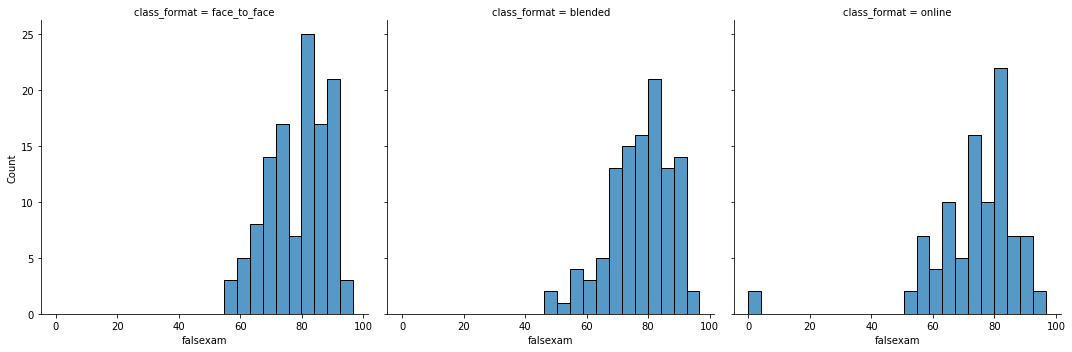

In [25]:
sns.displot(data3, x="falsexam",col="class_format")

data3.groupby(["class_format"]).describe()

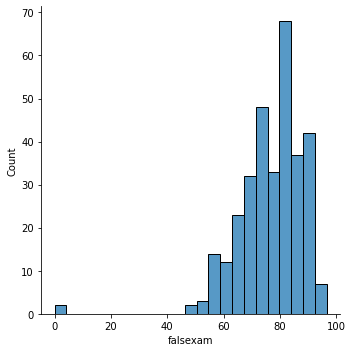

In [26]:
sns.displot(data, x="falsexam")

In [35]:
data = data.assign(valor_ol = data.format_ol*1, valor_blended = data.format_blended*2, valor_ftf = data.format_ftf*3)
data = data.assign(format_type = data.valor_ol + data.valor_blended + data.valor_ftf)
data

AttributeError: 'DataFrame' object has no attribute 'format_ftf'

In [36]:
sns.displot(data, x="falsexam", hue="format_type")
labels= ["Face to Face","Blended Format", "Online Lessons"]
plt.xlabel("Falsexam", fontsize=11)
plt.ylabel("Students", fontsize=11)
plt.title("Histograma", fontsize=12)
plt.legend(labels)

ValueError: Could not interpret value `format_type` for parameter `hue`

Difference-in-means estimator¶

In [31]:
data4 = data3[data3["class_format"].str.contains("blended") == False]
data4

,gender,etnicity,class_format,falsexam
0,Female,white,face_to_face,63.29997
1,Male,white,face_to_face,79.96000
4,Male,white,online,83.30000
5,Female,asian,online,88.34996
7,Male,asian,face_to_face,90.00000
...,...,...,...,...
316,Female,white,face_to_face,91.65000
317,Male,asian,face_to_face,84.99000
319,Male,asian,online,70.05000
320,Female,asian,online,66.69000


In [37]:
separar=[1.0, 3.0]
PRUEBA2 = DIM[DIM['format_type'].isin(separar)]

PRUEBA2

NameError: name 'DIM' is not defined

In [38]:
PRUEBA2.groupby(["format_type"]).mean()


NameError: name 'PRUEBA2' is not defined

In [39]:
Diferencia_medias=  78.547485-73.635263
Diferencia_medias

4.912222

Los valores en False Exam en el grupo de Face to Face son mayores que "Online Lesson". En ese sentido, más escogido sería el formato Face to Face.

# Difference-in-means estimator via linear regression


Las clases "face to face" obtuvieron un puntaje de 78.547485, mien tras que las "online lesson" uno de 73.635263. Dando a entender que se prefiere a las clases presenciales por sobre las virtuales además que el rendimientos de los alumnos no es igual.

In [40]:
PRUEBA3 = DIM
print(PRUEBA3.format_type)
for i in range (323):
    if (PRUEBA3.format_type[i]== 3.0):
        PRUEBA3.format_type[i] = 0.0

NameError: name 'DIM' is not defined

In [41]:
PRUEBA3
separar2 = [0.0, 1.0]

PRUEBA4 = PRUEBA3[PRUEBA3['format_type'].isin(separar2)]
PRUEBA4

NameError: name 'PRUEBA3' is not defined

In [42]:
OLS = sm.OLS.from_formula("falsexam ~ format_type", data = PRUEBA4).fit()

OLS.summary()

NameError: name 'PRUEBA4' is not defined